<a href="https://colab.research.google.com/github/cerean/nndl/blob/main/HW1_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 84020 Neural Networks and Deep Learning
#### Homework 1
#### Andrea Ceres and Shao Liu

# **PART3**

# Listing 8
#### Load libraries. Load the Wisconsin Diagnostic Breast Cancer dataset. Complete any 8 calculations and plottings using Seaborn package which are not included into the previous calculations and plottings with matplotlib. Two of these might be related to PCA.
1 Bivariate Density Plot

2) Categorized Empirical Cumulative Distribution Plot

3) Empirical Cumulative Distribution Plot

4) PCA Plot

5) Violin Plot

6) Strip Plot

7) Box Plot

8) Feature Selection, Prediction and Confusion Matrix

**Analysis**
From the Bivariate density plot of the first 10 features, we can see that only two feature can somehow reflect the difference between two labels(green and pink). For example, ‘compactness_mean’ and ‘perimeter_mean’ density plot shows two highly separated distributions of two labels (green and pink). However, ‘compactness_mean’ and ‘smoothness_mean’ formed same distribution of two labels which means it’s hard to distinguish two class by these two features. Categorized empirical cumulative distribution also shows different distribution of two labels. ‘perimeter_mean’ has extremely different distribution between two labels. Empirical cumulative distribution plot shows the unique distribution of each feature. PCA(2 components) shows how well the best two features can do to classify the categories. From the plot, we can see that blue spots and orange spots are nearly separated by two features in a 2 dimension space. 

The correlation matrix from Part 2: Listing 6, violin plots, strip plots, and bar plot below shed light on which features are least correlated to the diagnosis and to which there is little variation between the benign and malignant interquartiles. This, in addition to the dependent features ('perimeter_\*' and 'area_\*') described earlier, informs us in the dropping of some features in feature selection: 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'. Rerunning the model afterwards yields improved performance for every model, except linear discriminant analysis and naive bayes. For our purpose of diagnosing malignancies with the least amount of misses, the decision tree classifier performs the best, yielding a recall of 97% for the malignant class. 

a) Load libraries.

In [ ]:
# Load libraries
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [ ]:
# Set options
set_option('display.max_columns', 32)
# plt.style.use('seaborn-talk')
plt.style.use('seaborn-white')

b) Load the dataset.

In [ ]:
# Load dataset
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
colnames = ['id', 'diagnosis', 
         'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean', 
         'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
         'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
         'smoothness_se', 'compactness_se', 'concavity_se', 
         'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
dataset = read_csv(filename, names=colnames, header=None)

In [ ]:
# drop `id` identifier
dataset = dataset.drop(['id'], 1)

# recode target labels to 0 and 1
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0, 'M':1})

# Standardization
Y = dataset.iloc[:,0]
X_orig = dataset.iloc[:,1:]
X = (X_orig - X_orig.mean()) / (X_orig.std())

# X_orig = dataset.values[:, 1:]
# Y = dataset.values[:, 0]
# scaler_standardized = StandardScaler()
# X = scaler_standardized.fit_transform(X_orig)
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.096100     -2.071512        1.268817   0.983510         1.567087   
1       1.828212     -0.353322        1.684473   1.907030        -0.826235   
2       1.578499      0.455786        1.565126   1.557513         0.941382   
3      -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4       1.748758     -1.150804        1.775011   1.824624         0.280125   
..           ...           ...             ...        ...              ...   
564     2.109139      0.720838        2.058974   2.341795         1.040926   
565     1.703356      2.083301        1.614511   1.722326         0.102368   
566     0.701667      2.043775        0.672084   0.577445        -0.839745   
567     1.836725      2.334403        1.980781   1.733693         1.524426   
568    -1.806811      1.220718       -1.812793  -1.346604        -3.109349   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0            3.280628        2.650542             2.530249       2.215566   
1           -0.486643       -0.023825             0.547662       0.001391   
2            1.052000        1.362280             2.035440       0.938859   
3            3.399917        1.914213             1.450431       2.864862   
4            0.538866        1.369806             1.427237      -0.009552   
..                ...             ...                  ...            ...   
564          0.218868        1.945573             2.318924      -0.312314   
565         -0.017817        0.692434             1.262558      -0.217473   
566         -0.038646        0.046547             0.105684      -0.808406   
567          3.269267        3.294046             2.656528       2.135315   
568         -1.149741       -1.113893            -1.260710      -0.819349   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  \
0                  2.253764   2.487545   -0.564768      2.830540  2.485391   
1                 -0.867889   0.498816   -0.875473      0.263095  0.741749   
2                 -0.397658   1.227596   -0.779398      0.850180  1.180298   
3                  4.906602   0.326087   -0.110312      0.286341 -0.288125   
4                 -0.561956   1.269426   -0.789549      1.272070  1.189310   
..                      ...        ...         ...           ...       ...   
564               -0.930209   2.779634    0.070963      2.377491  2.601897   
565               -1.057681   1.299356    2.258951      1.155840  1.290429   
566               -0.894800   0.184730   -0.257145      0.276450  0.180539   
567                1.042778   1.156917    0.685485      1.437265  1.008615   
568               -0.560539  -0.070217    0.382756     -0.157311 -0.465742   

     smoothness_se  compactness_se  concavity_se  concave_points_se  \
0        -0.213814        1.315704      0.723390           0.660239   
1        -0.604819       -0.692317     -0.440393           0.259933   
2        -0.296744        0.814257      0.212889           1.423575   
3         0.689095        2.741868      0.818798           1.114027   
4         1.481763       -0.048477      0.827742           1.143199   
..             ...             ...           ...                ...   
564       1.085429        0.191637      0.665416           2.065360   
565      -0.423637       -0.069697      0.251980           0.807720   
566      -0.379008        0.660696      0.510377           0.611619   
567      -0.172848        2.015943      1.301140           0.785031   
568       0.049299       -1.162493     -1.056571          -1.911765   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0       1.147747              0.906286      1.885031      -1.358098   
1      -0.804742             -0.099356      1.804340      -0.368879   
2       0.236827              0.293301      1.510541      -0.023953   
3       4.728520              2.045711     -0.281217       0.133866  

c) Data visualization.

1）Bivariate Density Plot (first 10 features)

In [ ]:
#maximum absolute scaling
df_scaled = dataset.copy()

for column in df_scaled.columns[1:32]:
    df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
df_scaled

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1     0.639986      0.264257        0.651459   0.400240   
1            1     0.731768      0.452393        0.705040   0.530188   
2            1     0.700462      0.540988        0.689655   0.481008   
3            1     0.406261      0.518839        0.411565   0.154378   
4            1     0.721807      0.365071        0.716711   0.518593   
..         ...          ...           ...             ...        ...   
564          1     0.766987      0.570010        0.753316   0.591363   
565          1     0.716115      0.719196        0.696021   0.504198   
566          1     0.590537      0.714868        0.574536   0.343103   
567          1     0.732835      0.746690        0.743236   0.505798   
568          0     0.276058      0.624745        0.254218   0.072371   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0           0.724602          0.803706        0.703140             0.731113   
1           0.518605          0.227678        0.203608             0.348757   
2           0.670747          0.462942        0.462512             0.635686   
3           0.872093          0.821946        0.565604             0.522863   
4           0.613831          0.384482        0.463918             0.518390   
..               ...               ...             ...                  ...   
564         0.679315          0.335553        0.571462             0.690358   
565         0.598531          0.299363        0.337395             0.486630   
566         0.517442          0.296178        0.216753             0.263519   
567         0.720930          0.801969        0.823336             0.755467   
568         0.322093          0.126288        0.000000             0.000000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0         0.795724                0.807779   0.381135    0.185322   
1         0.596053                0.581589   0.189175    0.150235   
2         0.680592                0.615661   0.259520    0.161085   
3         0.854276                1.000000   0.172503    0.236643   
4         0.595066                0.603756   0.263557    0.159939   
..             ...                     ...        ...         ...   
564       0.567763                0.577073   0.409328    0.257114   
565       0.576316                0.567837   0.266446    0.504197   
566       0.523026                0.579639   0.158858    0.220061   
567       0.788487                0.720033   0.252698    0.326510   
568       0.522039                0.603859   0.134250    0.292323   

     perimeter_se   area_se  smoothness_se  compactness_se  concavity_se  \
0        0.390764  0.282921       0.205557        0.362186      0.135682   
1        0.154595  0.136629       0.167845        0.096603      0.046970   
2        0.208599  0.173423       0.197559        0.295864      0.096768   
3        0.156733  0.050221       0.292644        0.550812      0.142955   
4        0.247407  0.174179       0.369097        0.181758      0.143636   
..            ...       ...            ...             ...           ...   
564      0.349090  0.292696       0.330871        0.213516      0.131263   
565      0.236715  0.182663       0.185320        0.178951      0.099747   
566      0.155823  0.089543       0.189624        0.275554      0.119444   
567      0.262602  0.159019       0.209509        0.454801      0.179722   
568      0.115924  0.035319       0.230935        0.034417      0.000000   

     concave_points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0             0.300625     0.380367              0.207540      0.704218   
1             0.253836     0.175934              0.118365      0.693396   
2             0.389847     0.284991              0.153184      0.653996   
3             0.353665     0.755288              0.308579      0.413707   
4             0.357075     0.222419              0.171414      0.625416   

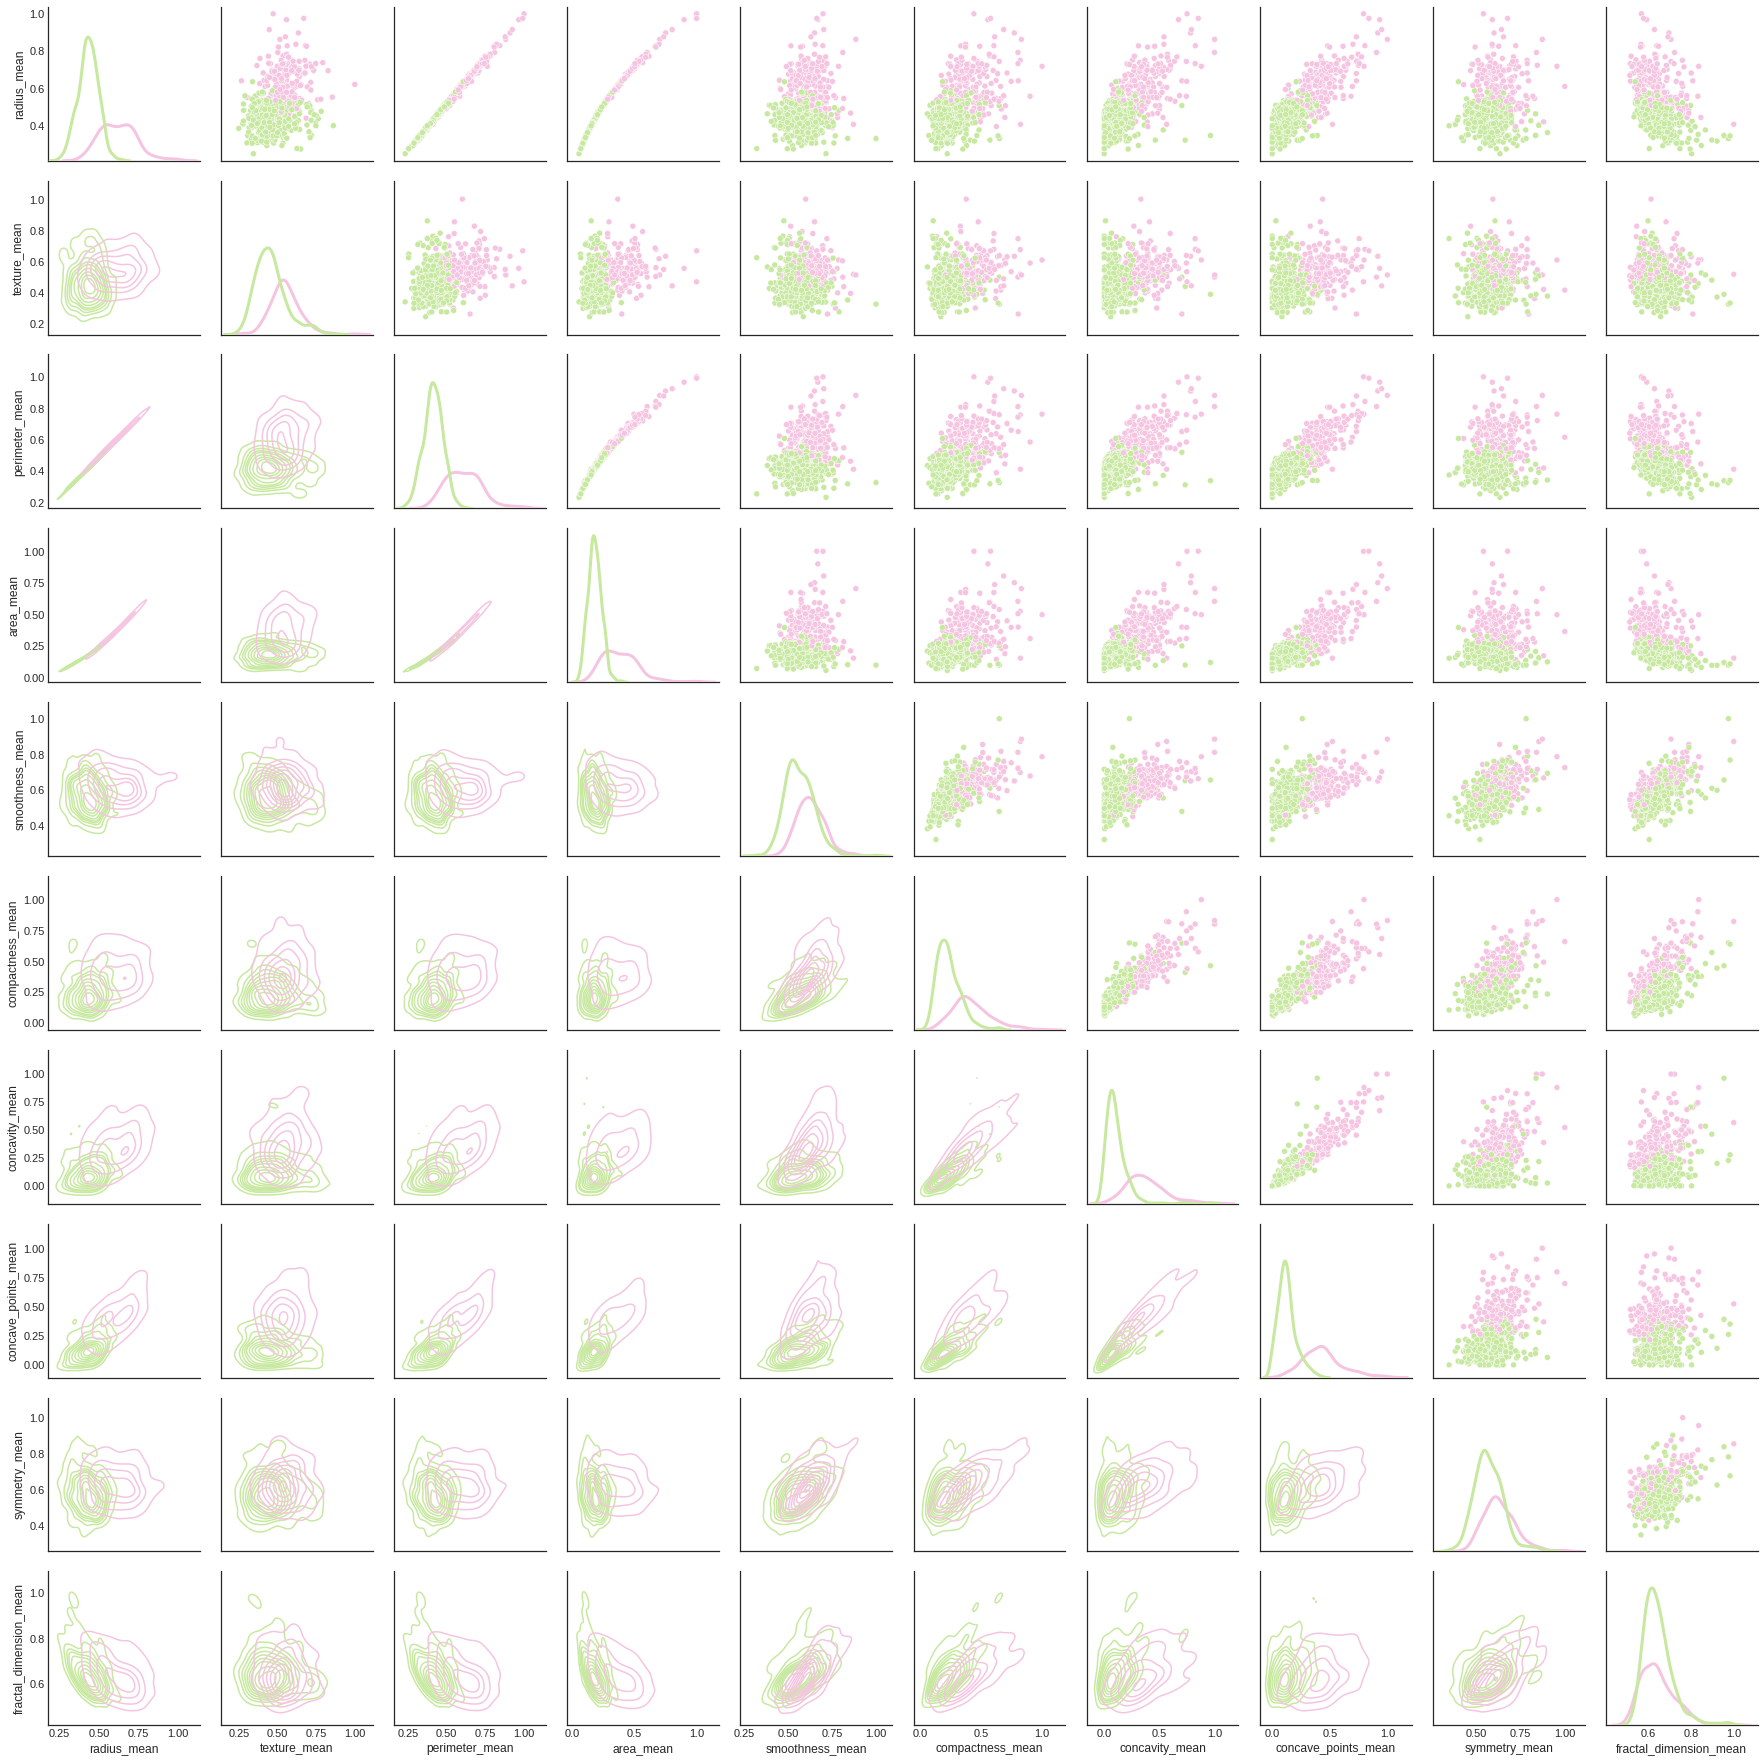

In [ ]:
features = list(dataset.columns[0:11])
data = df_scaled[features]

g = sns.PairGrid(data, hue='diagnosis', palette = 'PiYG_r')
# g.map(sns.scatterplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

2) Categorized Empirical Cumulative Distribution Plot

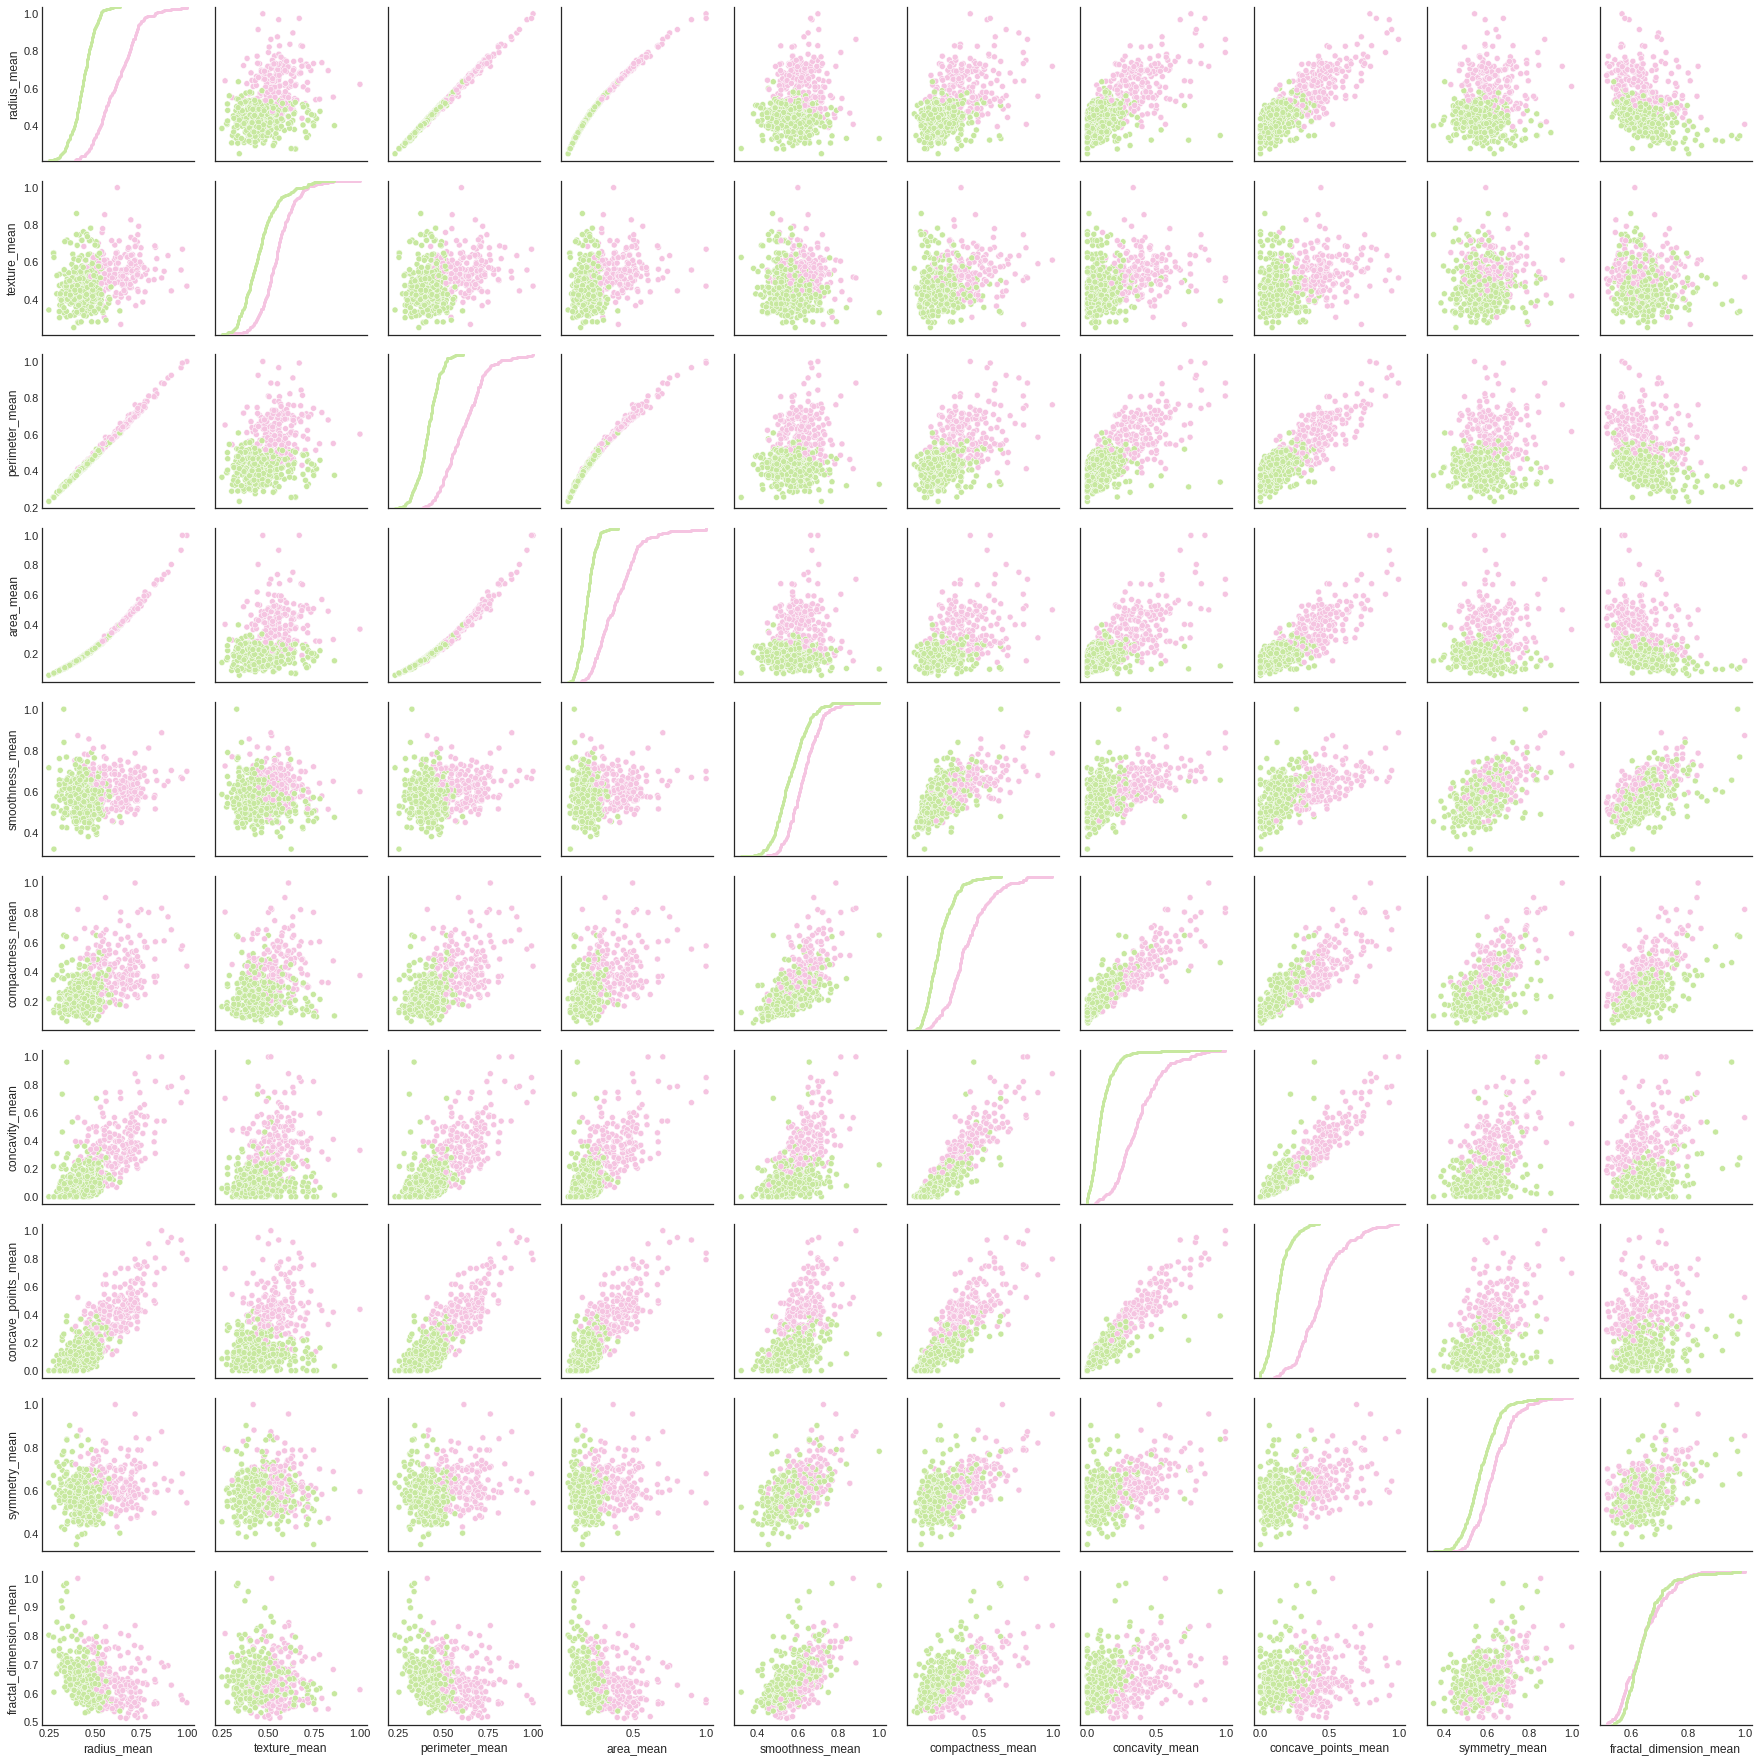

In [ ]:
# g2 = sns.PairGrid(data, hue='diagnosis', palette = 'PiYG_r')
g2 = sns.PairGrid(data, hue='diagnosis', palette = 'PiYG_r')
g2.map_diag(sns.ecdfplot, lw=3, legend=False)
g2.map_offdiag(sns.scatterplot)

3) Empirical Cumulative Distribution Plot

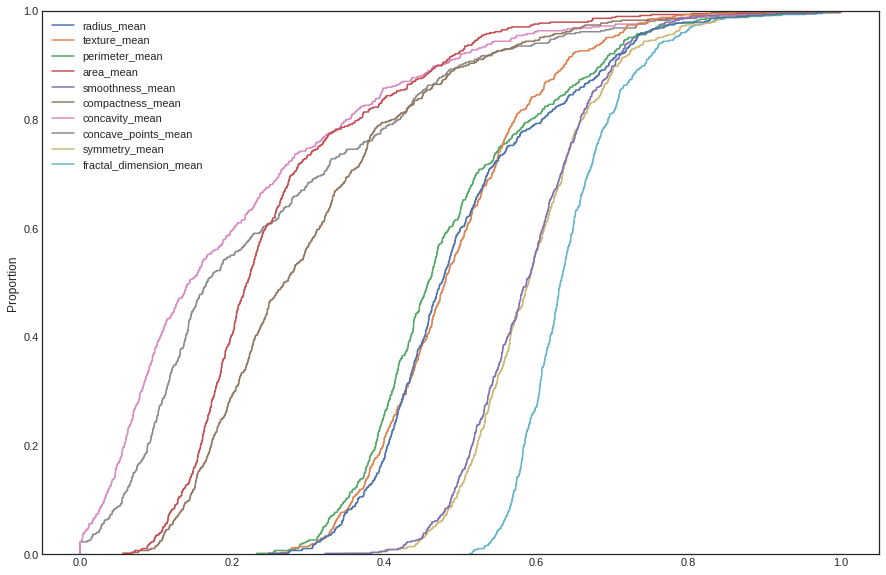

In [ ]:
features1 = list(dataset.columns[1:11])
data1 = df_scaled[features1]
plt.figure(figsize=(15, 10))
sns.ecdfplot(data1)

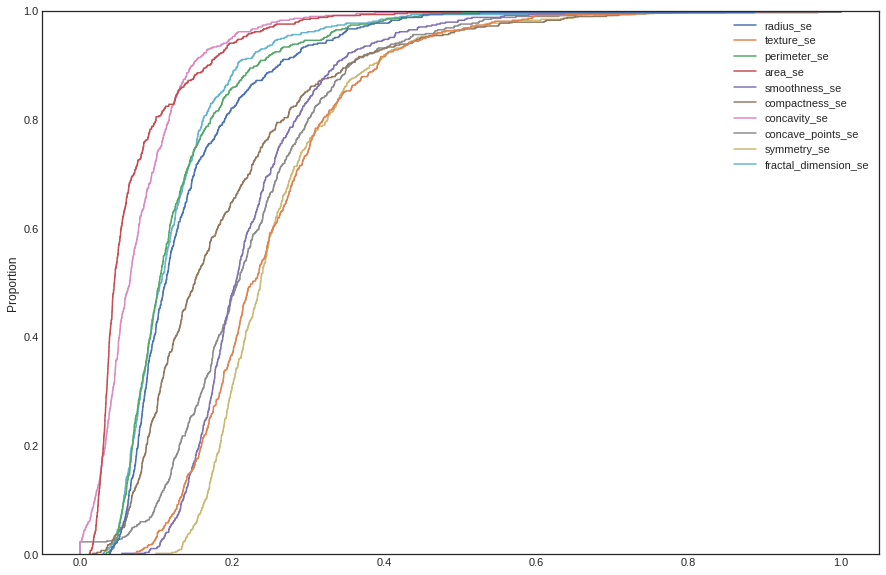

In [ ]:
features2 = list(dataset.columns[11:21])
data2 = df_scaled[features2]
plt.figure(figsize=(15, 10))
sns.ecdfplot(data2)

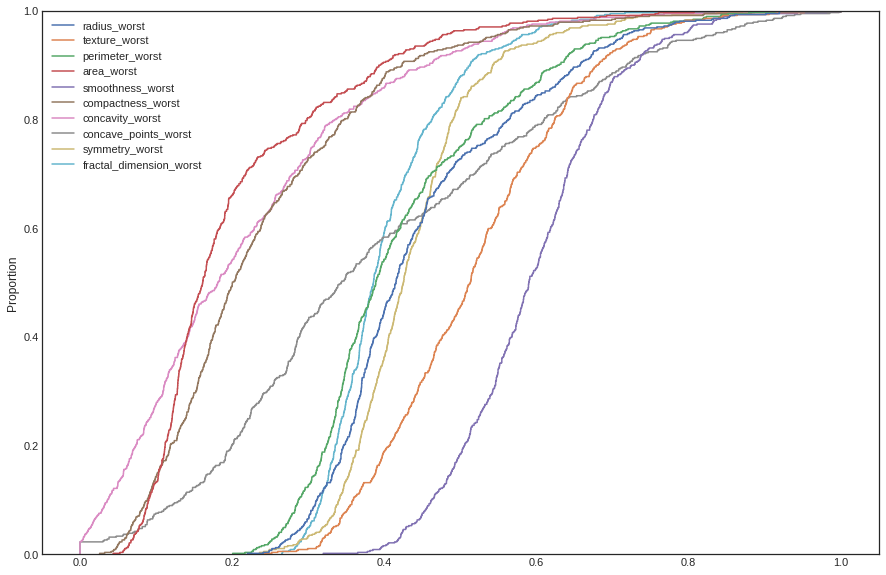

In [ ]:
features3 = list(dataset.columns[21:31])
data3 = df_scaled[features3]
plt.figure(figsize=(15, 10))
sns.ecdfplot(data3)

4) PCA plot (2 components)

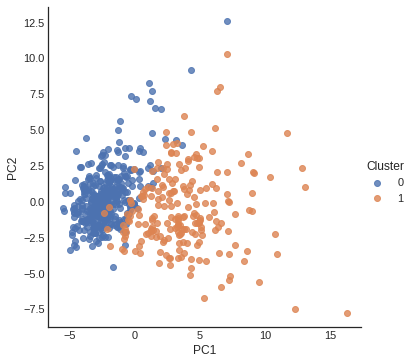

In [ ]:
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2'])
pc_df['Cluster'] = df_scaled['diagnosis']
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  )

5) Violin Plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

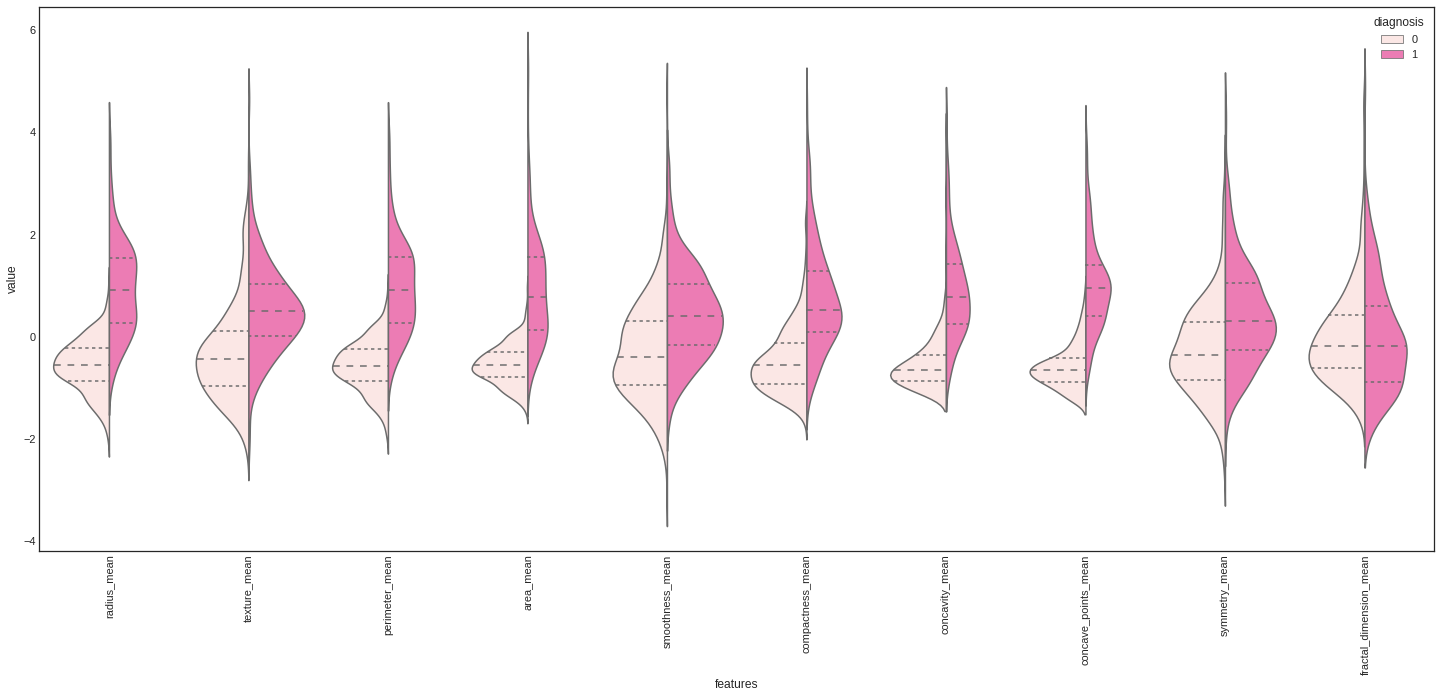

In [ ]:
data1_10 = pd.concat([Y, X.iloc[:,0:10]],axis=1)
data1_10 = pd.melt(data1_10, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data1_10, split=True, 
               inner="quartile", palette={0: "mistyrose", 1: "hotpink"})
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

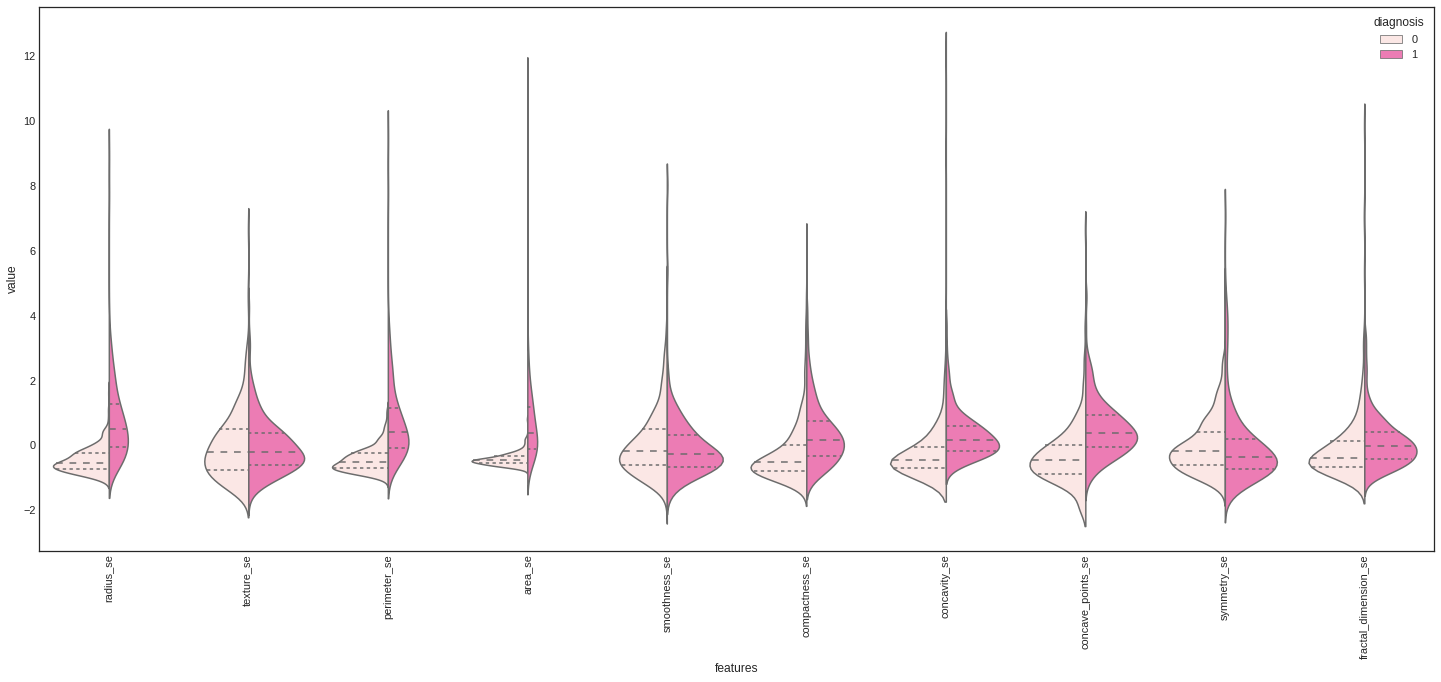

In [ ]:
data11_20 = pd.concat([Y, X.iloc[:,10:20]],axis=1)
data11_20 = pd.melt(data11_20, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data11_20, split=True, 
               inner="quartile", palette={0: "mistyrose", 1: "hotpink"})
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

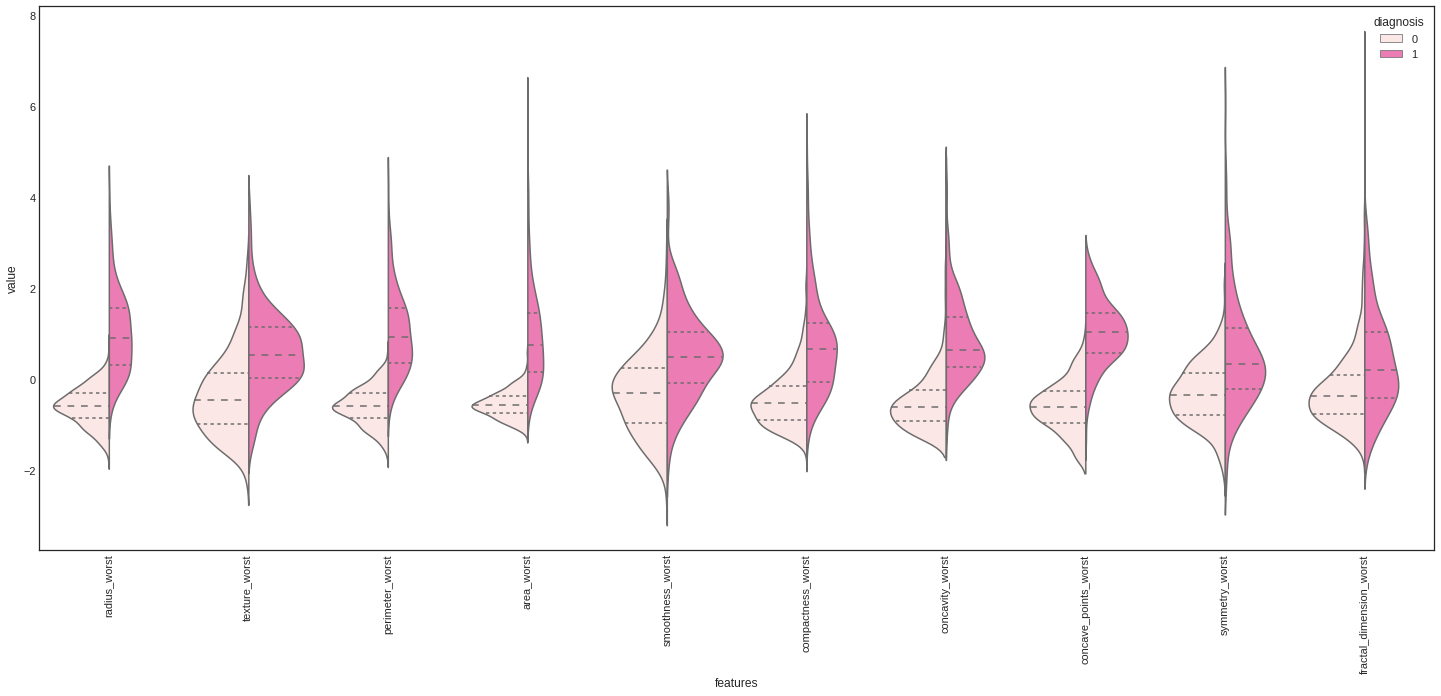

In [ ]:
data21_30 = pd.concat([Y, X.iloc[:,20:]],axis=1)
data21_30 = pd.melt(data21_30, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data21_30, split=True, 
               inner="quartile", palette={0: "mistyrose", 1: "hotpink"})
plt.xticks(rotation=90)

6) Strip Plot

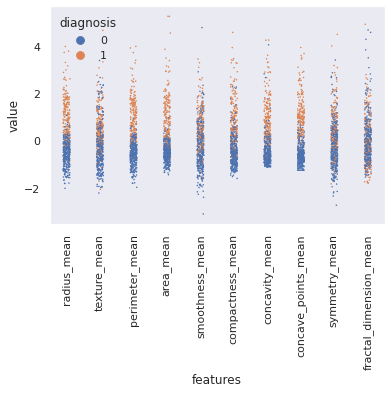

In [ ]:
sns.set(style = 'dark')
sns.stripplot(x='features', y='value', data=data1_10, hue='diagnosis', size=1.5)
plt.xticks(rotation=90)
plt.show()

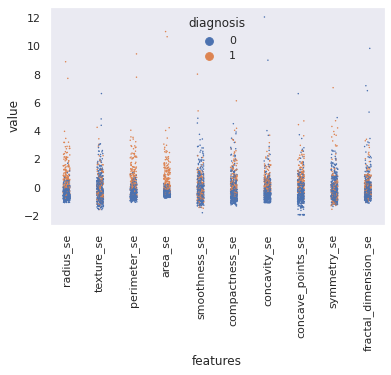

In [ ]:
sns.stripplot(x='features', y='value', data=data11_20, hue='diagnosis', size=1.5)
plt.xticks(rotation=90)
plt.show()

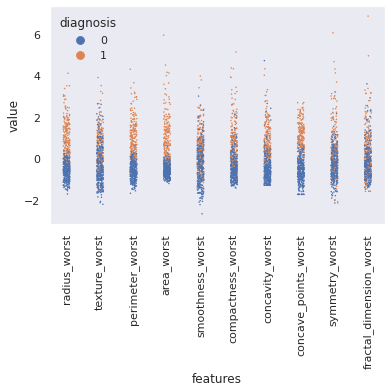

In [ ]:
sns.stripplot(x='features', y='value', data=data21_30, hue='diagnosis', size=1.5)
plt.xticks(rotation=90)
plt.show()

7) Box Plot

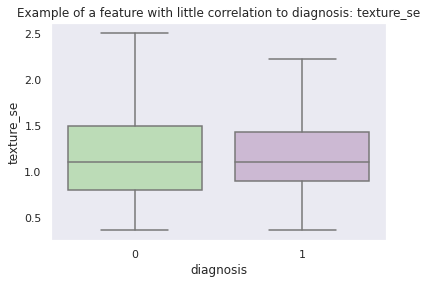

In [ ]:
bp = sns.boxplot(x='diagnosis', y='texture_se', data=dataset, showfliers=False, palette='PRGn_r')
bp.set_title('Example of a feature with little correlation to diagnosis: texture_se')
plt.show()

8) Feature Selection and Confusion Matrix

In [ ]:
# Based on dependence determined, drop perimeter and area features.
# Based on the correlation matrix and violin plots, drop features that have very little correlation to the target.
drop_list = ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst', 
'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']

X_fs = X.drop(drop_list,axis=1)
X_fs.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0     1.096100     -2.071512         1.567087          3.280628   
1     1.828212     -0.353322        -0.826235         -0.486643   
2     1.578499      0.455786         0.941382          1.052000   
3    -0.768233      0.253509         3.280667          3.399917   
4     1.748758     -1.150804         0.280125          0.538866   

   concavity_mean  concave_points_mean  symmetry_mean  radius_se  \
0        2.650542             2.530249       2.215566   2.487545   
1       -0.023825             0.547662       0.001391   0.498816   
2        1.362280             2.035440       0.938859   1.227596   
3        1.914213             1.450431       2.864862   0.326087   
4        1.369806             1.427237      -0.009552   1.269426   

   compactness_se  concavity_se  concave_points_se  radius_worst  \
0        1.315704      0.723390           0.660239      1.885031   
1       -0.692317     -0.440393           0.259933      1.804340   
2        0.814257      0.212889           1.423575      1.510541   
3        2.741868      0.818798           1.114027     -0.281217   
4       -0.048477      0.827742           1.143199      1.297434   

   texture_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      -1.358098          1.306537           2.614365         2.107672   
1      -0.368879         -0.375282          -0.430066        -0.146620   
2      -0.023953          0.526944           1.081980         0.854222   
3       0.133866          3.391291           3.889975         1.987839   
4      -1.465481          0.220362          -0.313119         0.612640   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0              2.294058        2.748204                 1.935312  
1              1.086129       -0.243675                 0.280943  
2              1.953282        1.151242                 0.201214  
3              2.173873        6.040726                 4.930672  
4              0.728618       -0.867590                -0.396751

In [ ]:
val_size = 0.20
seed = 7
X_train, X_val, Y_train, Y_val = train_test_split(X_fs, Y, test_size=val_size, random_state=seed)

def model_predict(name, model):
    model.fit(X_train, Y_train)
    pred = model.predict(X_val)
    print("%s: %f" % (name, accuracy_score(Y_val, pred)))
    cm = confusion_matrix(Y_val, pred)
    sns.heatmap(cm, annot=True, fmt="d")
    print(classification_report(Y_val, pred))
    
    return pred

LR: 0.964912
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



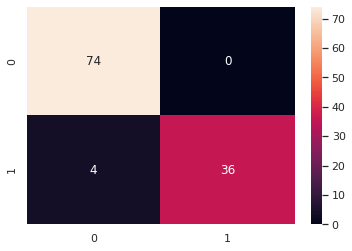

In [ ]:
pred_lr = model_predict('LR', LogisticRegression(solver='liblinear'))

LDA: 0.938596
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        74
           1       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



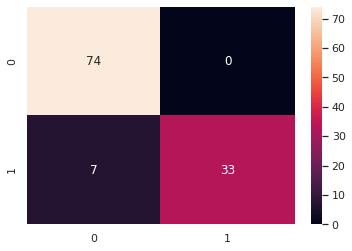

In [ ]:
pred_lda = model_predict('LDA', LinearDiscriminantAnalysis())

KNN: 0.964912
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



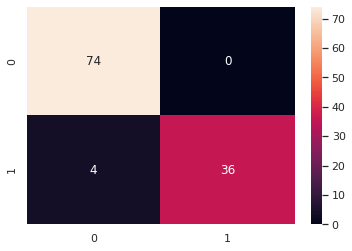

In [ ]:
pred_knn = model_predict('KNN', KNeighborsClassifier())

CART: 0.929825
              precision    recall  f1-score   support

           0       0.99      0.91      0.94        74
           1       0.85      0.97      0.91        40

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



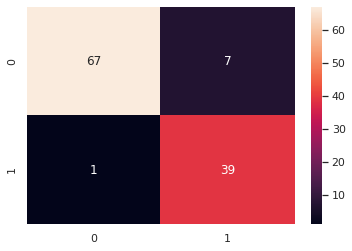

In [ ]:
pred_cart = model_predict('CART', DecisionTreeClassifier(random_state=seed))

NB: 0.929825
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        74
           1       0.90      0.90      0.90        40

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



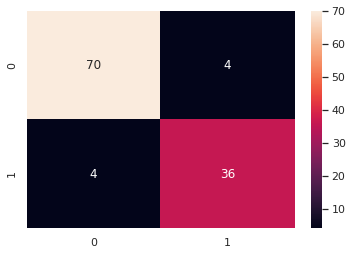

In [ ]:
pred_nb = model_predict('NB', GaussianNB())

SVM: 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



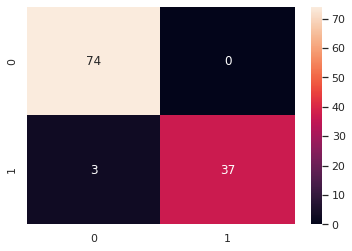

In [ ]:
pred_svm = model_predict('SVM', SVC())